In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'ds5_train.csv')

In [3]:
data

,x_1,y
0,-4.029750,-0.420076
1,-2.524577,0.205268
2,2.794617,0.773794
3,1.695904,0.210476
4,-1.458392,0.858475
...,...,...
295,-0.955188,0.651637
296,1.870870,-0.153545
297,4.738397,-0.394805
298,2.384711,-0.474689


In [4]:
#validation dataset 
data_val=pd.read_csv(r'ds5_valid.csv')

x_train_val=data_val.loc[:,['x_1']]
y_train_val=data_val.loc[:,['y']]


x_val=x_train_val.values
y_val=y_train_val.values
y_val_pred=np.zeros((y_val.shape[0],y_val.shape[1]))

colsx1=x_train_val.shape[0]
zer1=np.ones((colsx1,1))
x_train_val_new=np.hstack((zer1,x_val))

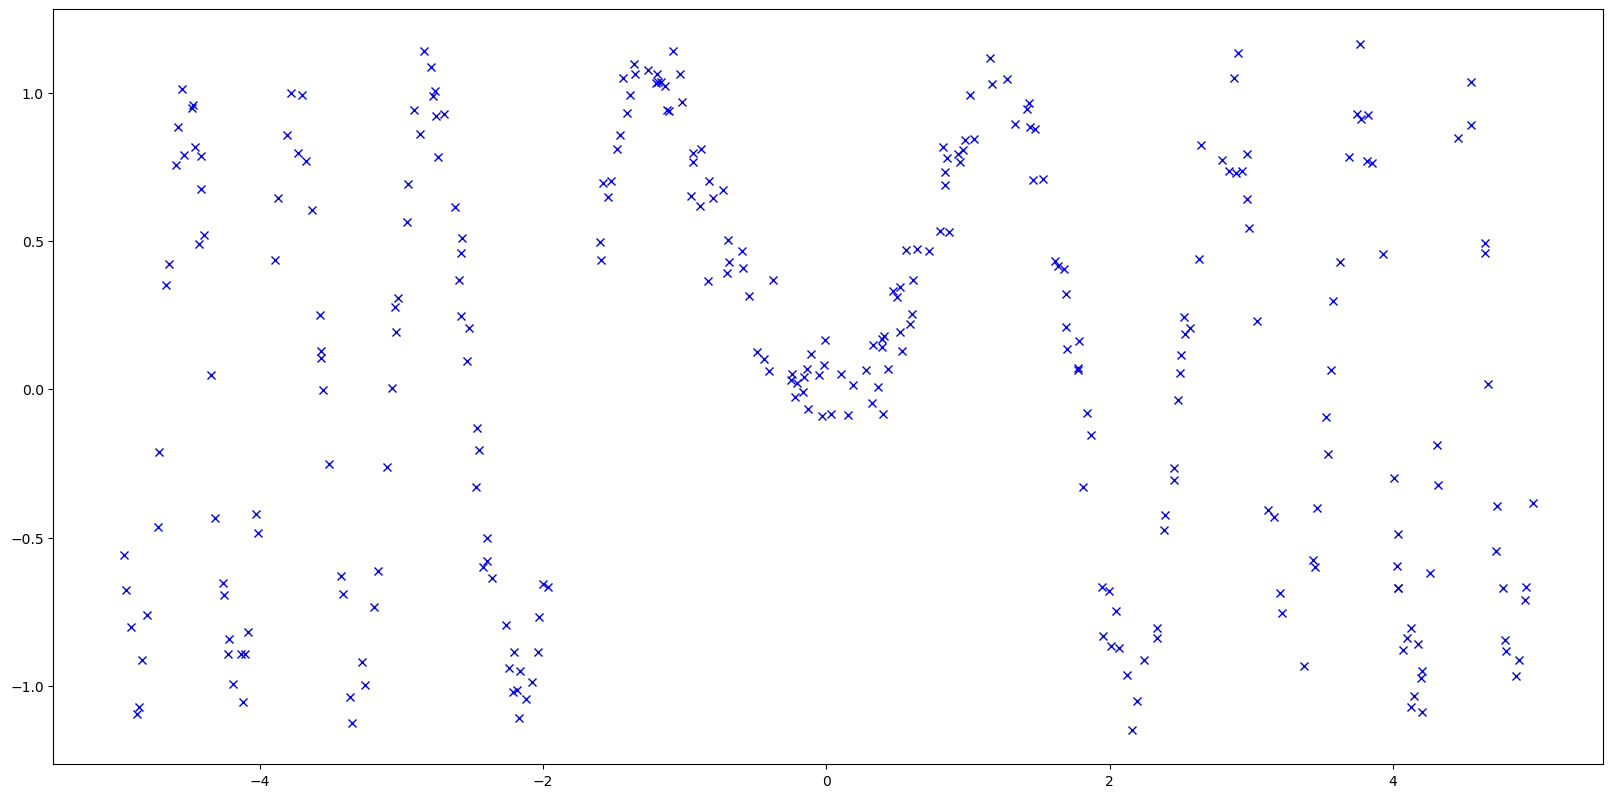

In [6]:
##################################################plotting the dataset##########################################################

x_train=data.loc[:,['x_1']]
y_train=data.loc[:,['y']]


x=x_train.values
y=y_train.values

#xx=x
#for j in range(4):
 #   powe=xx**(j+2)
 #   x_train_new=np.hstack((x,powe))
  #  x=x_train_new
    

#x_train_new=x




#x_t=np.tile(x,(1,(x_train.shape[0])))
colsx=x_train.shape[0]
zer=np.ones((colsx,1))

x_train_new=np.hstack((zer,x))
#x_t=np.tile(x_train_new,(1,(x_train.shape[0])))
#new_x=x_t-x.T

#c=np.linalg.norm((x_train_new[None]-x_train_new[:,None]),axis=2)
#new_x=new_x.T


u=x_train_new[None]
v=x_train_val_new[:,None]
new_x=u-v
plt.figure(figsize=(20,10),dpi=100)
plt.plot(x,y,'bx',linewidth=1)

plt.show()

In [71]:
####################################  ##TRAINING THE MODEL AND  PREDICTION ON VALIDATION DATASET################################


tau=0.1
g=lambda x:np.exp(-((x**2)/(2*(tau**2))))
w=g(np.linalg.norm(new_x,axis=2))


j=0
for ww in w:
    ww=np.diag(ww)
    theta = (((np.linalg.inv((x_train_new.T@ww)@x_train_new))@(x_train_new.T))@ww)@y
    y_val_pred[j]=x_train_val_new[j].dot(theta)
    j+=1


mse = ((y_val_pred - y_val) ** 2).mean()
mse

0.02422458937981112

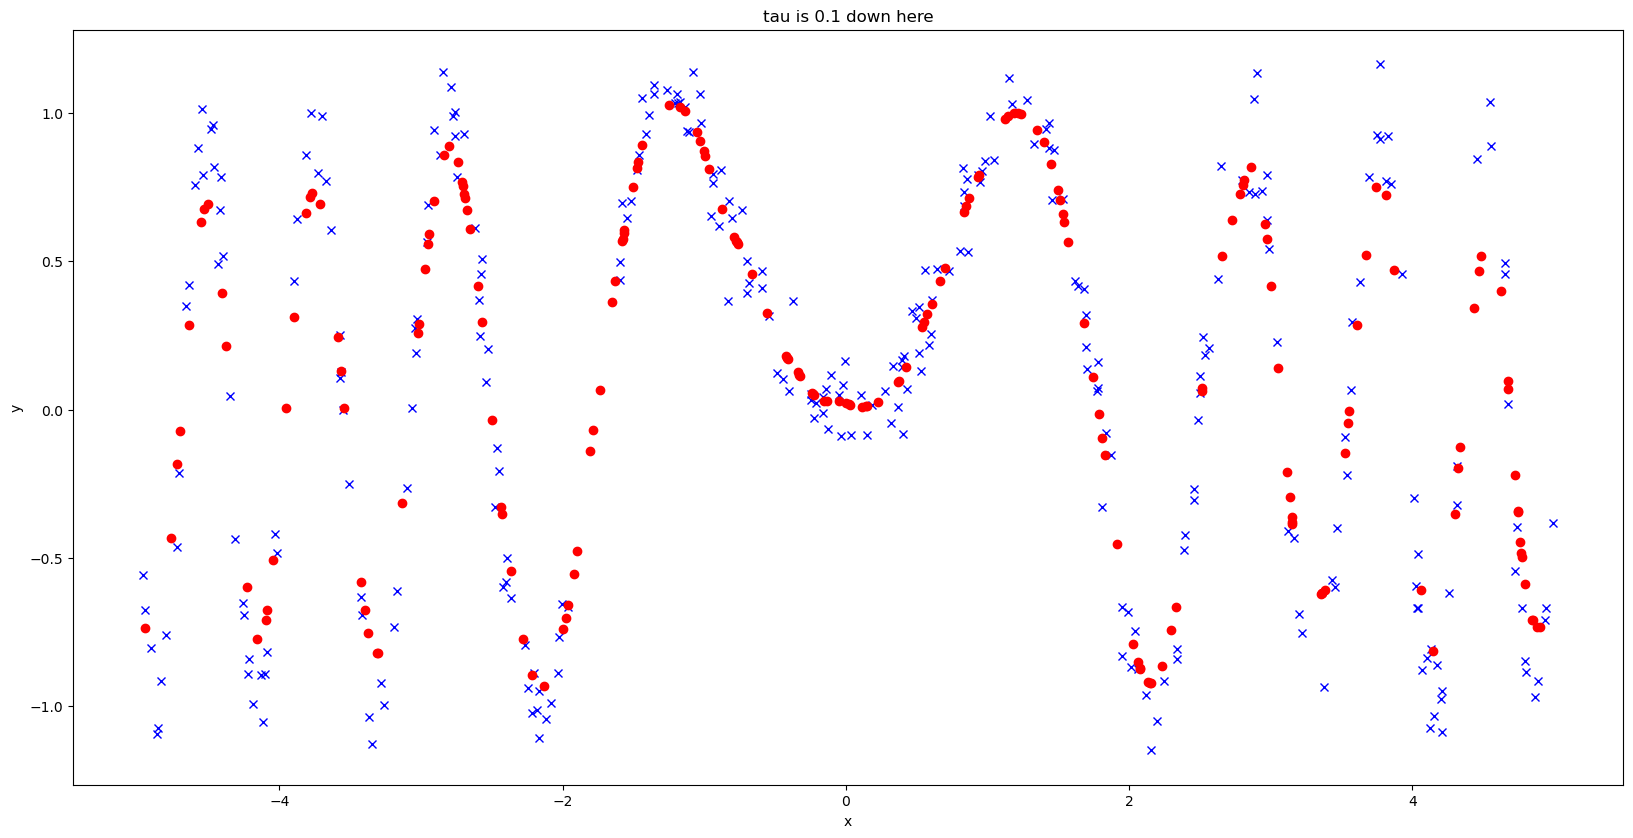

In [72]:
###########################################plotting training and validation#####################################################


f=plt.figure(figsize=(20,10),dpi=100)
plt.plot(x,y,'bx',linewidth=1)
plt.plot(x_val,y_val_pred,'ro',linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'tau is {tau} down here')
plt.show()
#f.savefig('prob_5b_valid_dataset')